## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [39]:
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from keras import optimizers as opt
from keras import callbacks

import tensorflow as tf

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
def neuron_number_experiment(n_neurons: list, X_train, y_train):
    tf.random.set_seed(42)
    model = Sequential()
    
    plt.figure(figsize=(20, 15))
    plot = 0
    
    for neuron in n_neurons:
        plot += 1
        
        model.add(Dense(neuron, input_shape=(X_train.shape[1],), activation='relu'))
        model.add(Dense(neuron // 2, activation='relu'))
        model.add(Dense(y_train.shape[1], activation='sigmoid'))
        
        model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
        
        history = model.fit(X_train, 
                            y_train,
                            epochs=5,
                            batch_size=1000, 
                            verbose=1,
                            validation_split=0.2
                           )
        
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        
        plt.subplot(3, 4, plot)
        plt.plot(train_acc, label='train')
        plt.plot(val_acc, label='val')
        plt.title(f'n_neurons={neuron}', c='r')
        plt.legend()     

In [23]:
def layer_number_experiment(n_params: int, n_layers: list, X_train, y_train):
    model = Sequential()
    tf.random.set_seed(2255)
    
    plt.figure(figsize=(20, 5))
    plot = 0
    
    for n_layer in n_layers:
        
        n_neurons = int(n_params / n_layer / X_train.shape[1])
        
        for layer in range(n_layer):
            if not layer:
                model.add(Dense(n_neurons, input_shape=(X_train.shape[1],), activation='relu'))
            else:
                model.add(Dense(n_neurons, activation='relu'))
        
        model.add(Dense(y_train.shape[1], activation='sigmoid'))

        model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
        
        history = model.fit(X_train, 
                            y_train,
                            epochs=5,
                            batch_size=1000, 
                            verbose=1,
                            validation_split=0.2
                           )
        
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        
        plot += 1
        plt.subplot(1, 4, plot)
        plt.plot(train_acc, label='train')
        plt.plot(val_acc, label='val')
        plt.title(f'neurons={n_neurons} layers={n_layer}', c='r')
        plt.legend()     

In [42]:
def optimizer_experiment(optimizer_list, X_train, y_train):
    tf.random.set_seed(42)
    model = Sequential()
    
    plt.figure(figsize=(16, 5))
    plot = 0
    
    for opt in optimizer_list:
        plot += 1
        
        model.add(Dense(29, input_shape=(X_train.shape[1],), activation='relu'))
        model.add(Dense(29, activation='relu'))
        model.add(Dense(29, activation='relu'))
        model.add(Dense(y_train.shape[1], activation='sigmoid'))
        
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        
        history = model.fit(X_train, 
                            y_train,
                            epochs=5,
                            batch_size=1000, 
                            verbose=1,
                            validation_split=0.2
                           )
        
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        
        plt.subplot(1, 3, plot)
        plt.plot(train_acc, label='train')
        plt.plot(val_acc, label='val')
        plt.title(f'neurons=29\nlayers=3\noptimizer={opt}', c='r')
        plt.legend() 

In [4]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


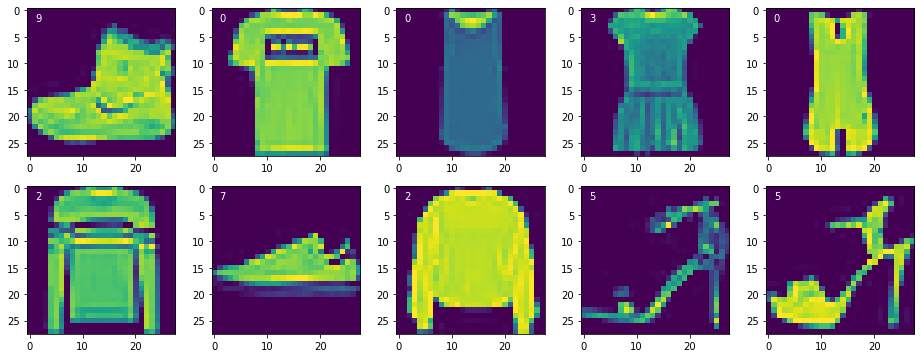

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i, :].reshape([28, 28]))
    plt.text(1, 2, y_train_labels[i], c='w')

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [7]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 2.0943 - accuracy: 0.1628 - val_loss: 1.9174 - val_accuracy: 0.2410
Epoch 2/5
48/48 [==============================] - 0s 3ms/step - loss: 1.7477 - accuracy: 0.3984 - val_loss: 1.5488 - val_accuracy: 0.5102
Epoch 3/5
48/48 [==============================] - 0s 3ms/step - loss: 1.3697 - accuracy: 0.6016 - val_loss: 1.1481 - val_accuracy: 0.6812
Epoch 4/5
48/48 [==============================] - 0s 3ms/step - loss: 0.9766 - accuracy: 0.7219 - val_loss: 0.8206 - val_accuracy: 0.7548
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 0.7475 - accuracy: 0.7791 - val_loss: 0.6834 - val_accuracy: 0.7793
Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 2.1749 - accuracy: 0.2241 - val_loss: 2.0372 - val_accuracy: 0.3617
Epoch 2/5
48/48 [==============================] - 0s 4ms/step - loss: 1.8770 - accuracy: 0.3728 - val_loss: 1.7011 - val_accuracy: 0.3833
Epoch 3/5
48/48 [==========

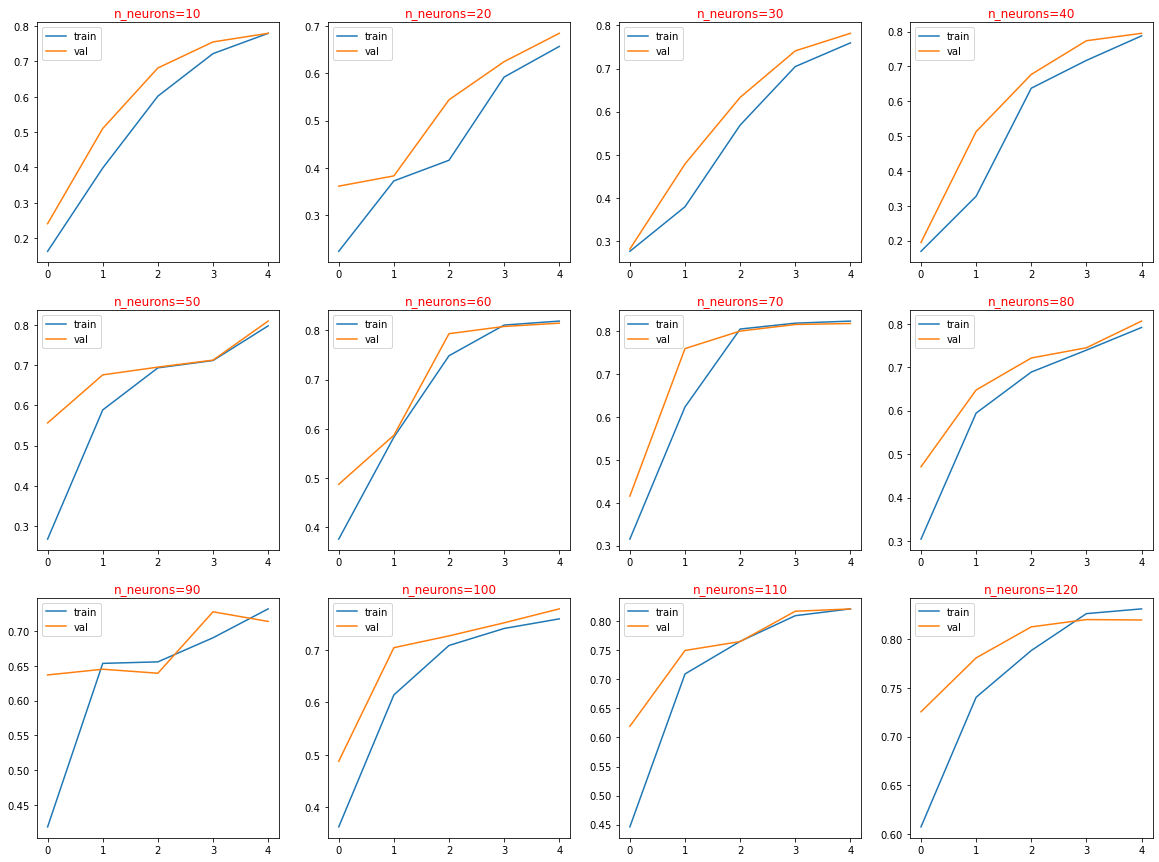

In [9]:
n_neurons = [i*10 for i in range(1, 13)] 
neuron_number_experiment(n_neurons=n_neurons,
                         X_train=X_train,
                         y_train=y_train)

Как видно из грфиков, с увеличением числа нейронов растет точность сети, но после определенного числа нейронов наступает переобучение. Так же видно, что 60 нейронов показали такой же результат, как и 110 нейронов, а значит, нету смысла использовать большие мощности для обучения более сложной сети.

In [10]:
n_layers = [2, 3, 5, 10]

Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 1.2612 - accuracy: 0.5627 - val_loss: 0.7150 - val_accuracy: 0.7412
Epoch 2/5
48/48 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7904 - val_loss: 0.5431 - val_accuracy: 0.8127
Epoch 3/5
48/48 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.8259 - val_loss: 0.4927 - val_accuracy: 0.8279
Epoch 4/5
48/48 [==============================] - 0s 5ms/step - loss: 0.4660 - accuracy: 0.8394 - val_loss: 0.4572 - val_accuracy: 0.8378
Epoch 5/5
48/48 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.8501 - val_loss: 0.4346 - val_accuracy: 0.8479
Epoch 1/5
48/48 [==============================] - 1s 7ms/step - loss: 2.0127 - accuracy: 0.3736 - val_loss: 1.6414 - val_accuracy: 0.4433
Epoch 2/5
48/48 [==============================] - 0s 5ms/step - loss: 1.2338 - accuracy: 0.6203 - val_loss: 0.8823 - val_accuracy: 0.7572
Epoch 3/5
48/48 [==========

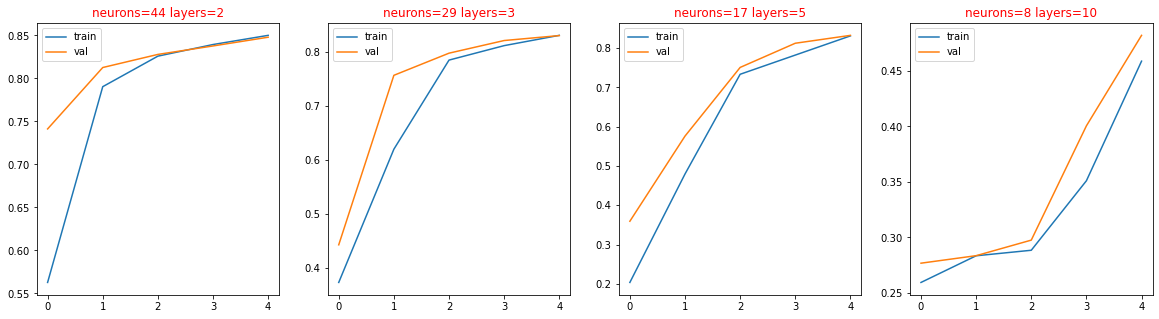

In [21]:
layer_number_experiment(n_params=70000,
                        n_layers=n_layers,
                        X_train=X_train, 
                        y_train=y_train)

Как видно из графиков, при фиксировнном количестве обучаемых параметров на результат вляет баланс количества нейронов и слоев. Мне кажется более стабильным вариант с 29 неронами и 3 слоями.

In [25]:
optimizer_list = ['SGD', 'Adam', 'RMSProp']

Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 2.2151 - accuracy: 0.2414 - val_loss: 2.1039 - val_accuracy: 0.3133
Epoch 2/5
48/48 [==============================] - 0s 4ms/step - loss: 1.9850 - accuracy: 0.3778 - val_loss: 1.8250 - val_accuracy: 0.4716
Epoch 3/5
48/48 [==============================] - 0s 4ms/step - loss: 1.6722 - accuracy: 0.5366 - val_loss: 1.4992 - val_accuracy: 0.5896
Epoch 4/5
48/48 [==============================] - 0s 4ms/step - loss: 1.3865 - accuracy: 0.6059 - val_loss: 1.2592 - val_accuracy: 0.6297
Epoch 5/5
48/48 [==============================] - 0s 4ms/step - loss: 1.1880 - accuracy: 0.6366 - val_loss: 1.0979 - val_accuracy: 0.6506
Epoch 1/5
48/48 [==============================] - 1s 8ms/step - loss: 2.0968 - accuracy: 0.3630 - val_loss: 1.7611 - val_accuracy: 0.4652
Epoch 2/5
48/48 [==============================] - 0s 5ms/step - loss: 1.3474 - accuracy: 0.6046 - val_loss: 0.9667 - val_accuracy: 0.6481
Epoch 3/5
48/48 [==========

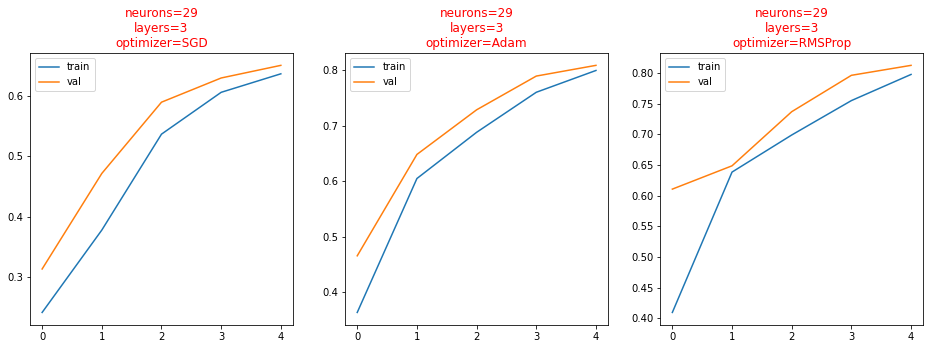

In [26]:
optimizer_experiment(optimizer_list=optimizer_list,
                     X_train=X_train,
                     y_train=y_train)

Видно, что при заданных подобранных параметрах хорошо показали себя оптимизаторы ФП SGD и Adam. Хотя и последний тоже сходится в итоге. Как вывод думаю, что хорошо подобранные параметры сети снижают влияние оптимизатора.

In [28]:
model = Sequential()
model.add(Dense(29, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(29, activation='relu'))
model.add(Dense(29, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, 
          y_train,
          epochs=5,
          batch_size=1000, 
          verbose=1,
          validation_split=0.2
         )

Epoch 1/5
48/48 [==============================] - 1s 6ms/step - loss: 1.4125 - accuracy: 0.5230 - val_loss: 0.7909 - val_accuracy: 0.7402
Epoch 2/5
48/48 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.7775 - val_loss: 0.5682 - val_accuracy: 0.8073
Epoch 3/5
48/48 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8210 - val_loss: 0.5052 - val_accuracy: 0.8273
Epoch 4/5
48/48 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.8357 - val_loss: 0.4715 - val_accuracy: 0.8397
Epoch 5/5
48/48 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8445 - val_loss: 0.4615 - val_accuracy: 0.8381


In [29]:
preds= model.predict(X_test)

In [38]:
confusion_matrix(y_test_labels, np.argmax(preds, axis=1))

array([[750,   6,   8,  52,   5,   0, 162,   0,  16,   1],
       [  3, 955,   4,  26,   7,   0,   4,   0,   1,   0],
       [ 11,   2, 689,  11, 131,   2, 141,   0,  13,   0],
       [ 26,  14,  12, 851,  37,   1,  55,   0,   4,   0],
       [  0,   1, 110,  30, 686,   1, 167,   0,   5,   0],
       [  0,   0,   0,   2,   0, 932,   0,  39,   4,  23],
       [103,   3,  92,  35,  62,   1, 678,   0,  26,   0],
       [  0,   0,   0,   0,   0,  46,   0, 905,   0,  49],
       [  2,   1,   8,   8,   4,   5,  18,   6, 948,   0],
       [  0,   0,   0,   2,   0,  32,   0,  39,   1, 926]], dtype=int64)